Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [76]:
data=pd.read_csv("/content/boston.csv")

In [77]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [78]:
data.shape

(506, 14)

Exploratory Data Anaysis

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [80]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [81]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [82]:
data.rename(columns={'MEDV':'Price'}, inplace=True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


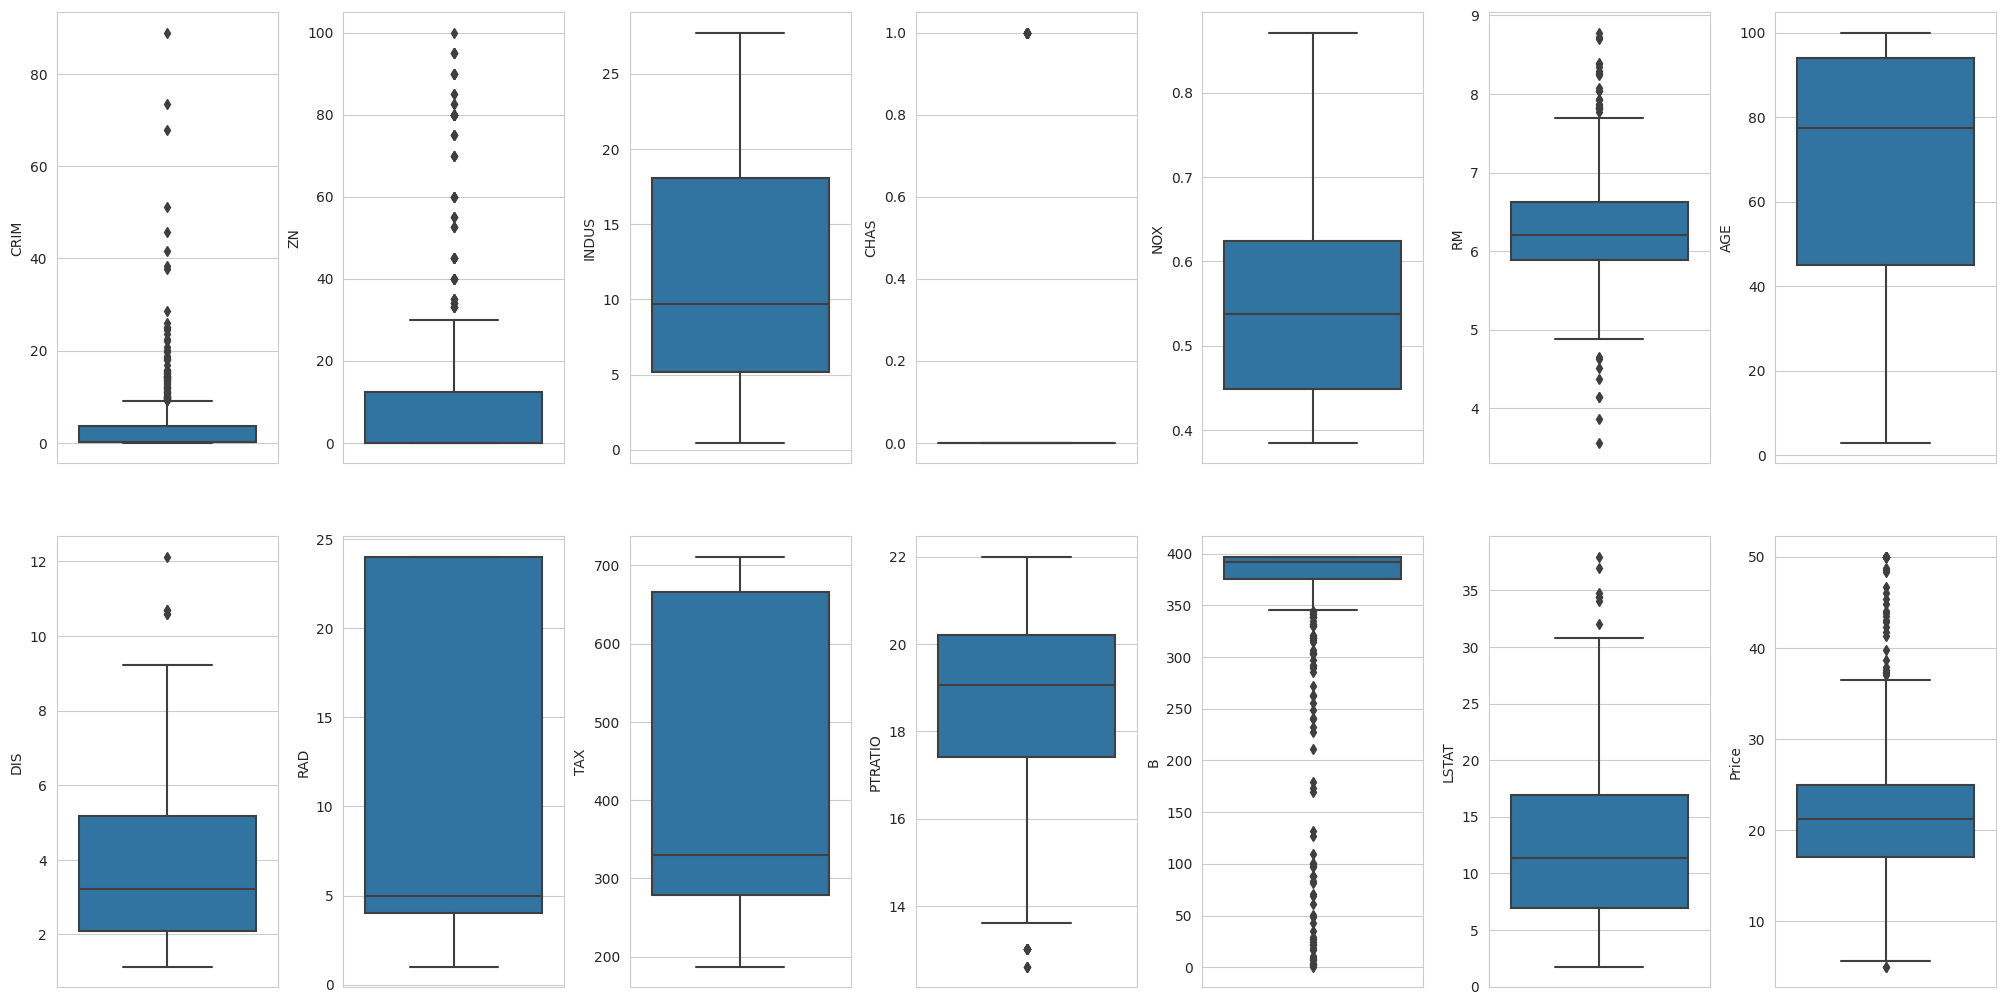

In [83]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

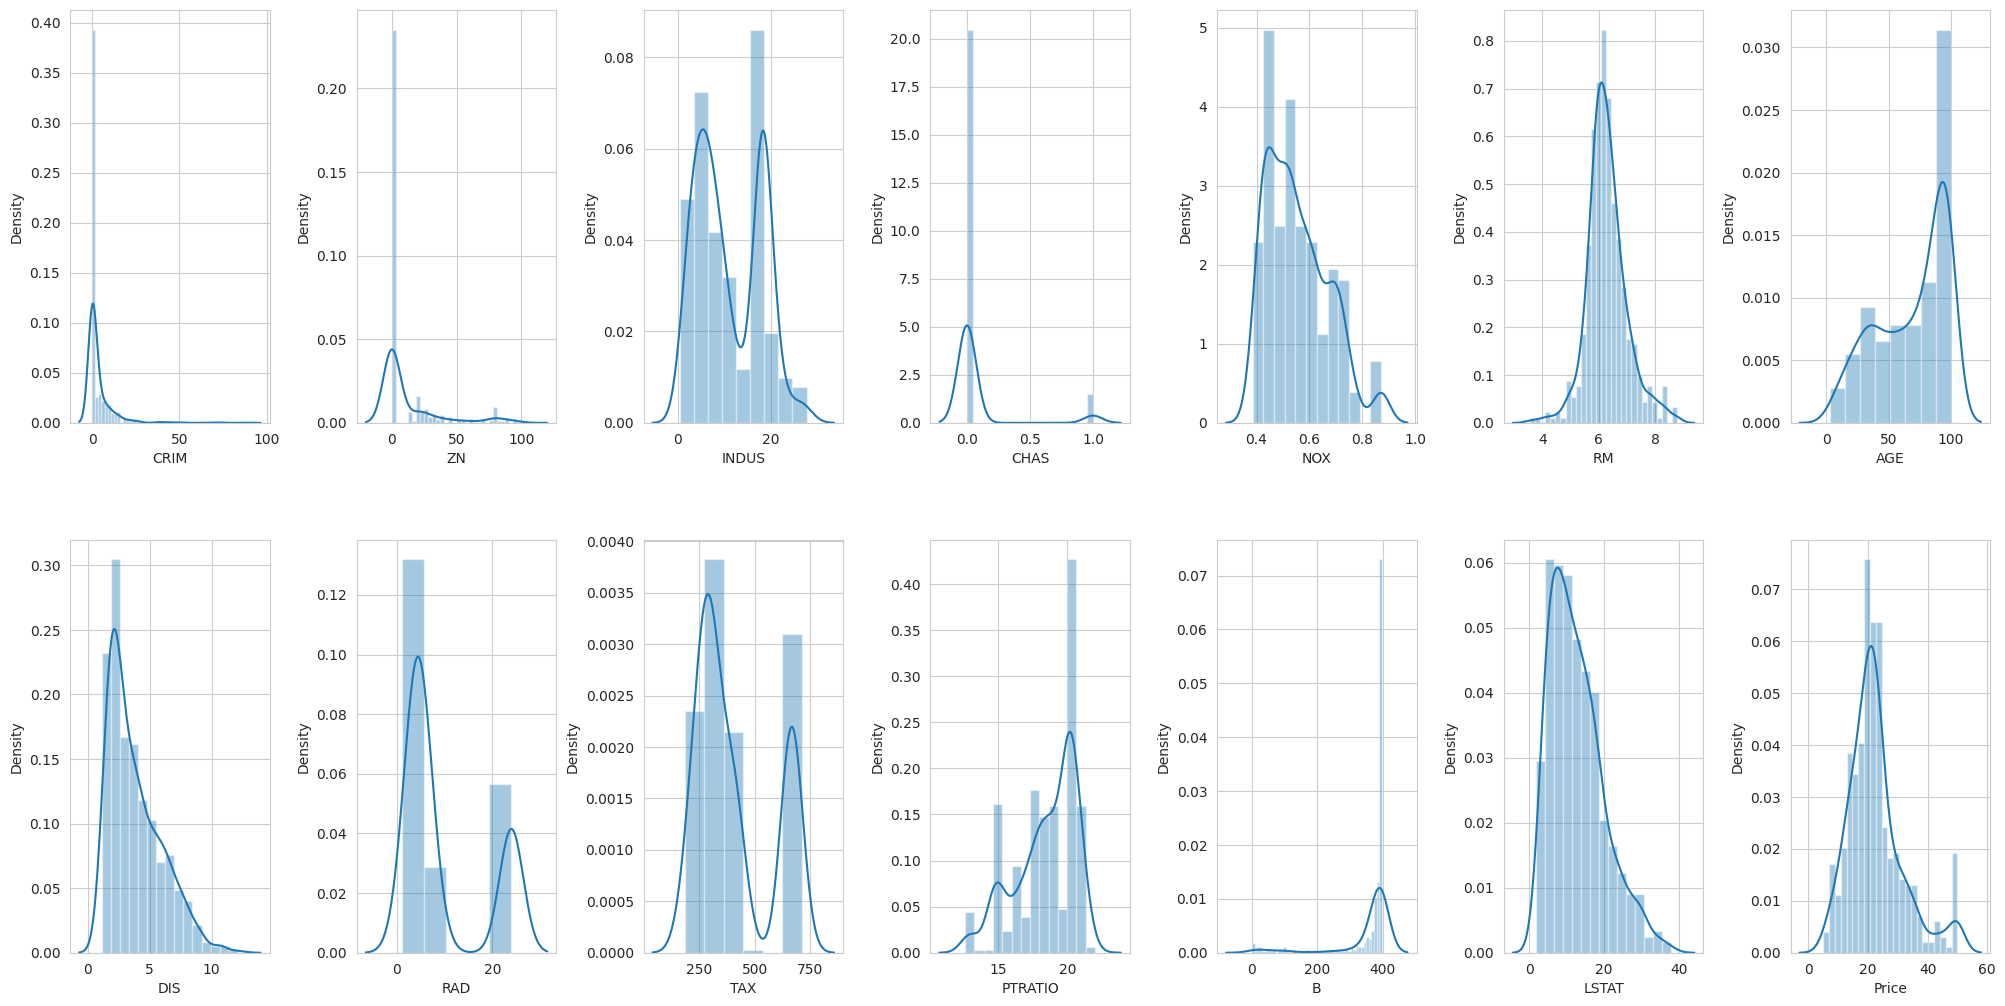

In [84]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, value in data.items():
    sns.distplot(value, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Visualize distribution of all the continuous variables in the data using histograms

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >, <Axes: >]],
      dtype=object)

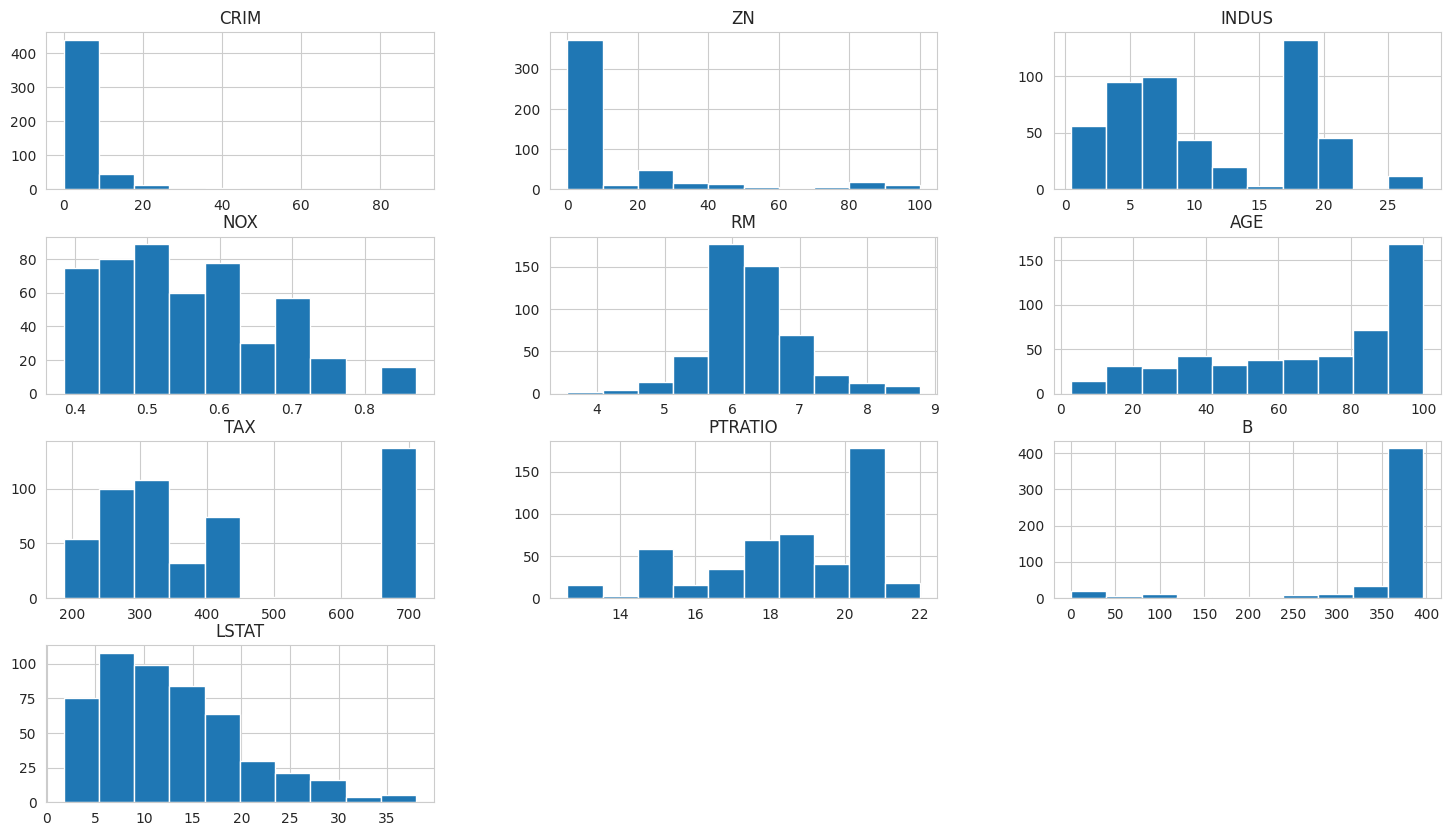

In [85]:
data.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

Visualize distribution of all the categorical variables in the data using count plots

<Axes: xlabel='CHAS', ylabel='count'>

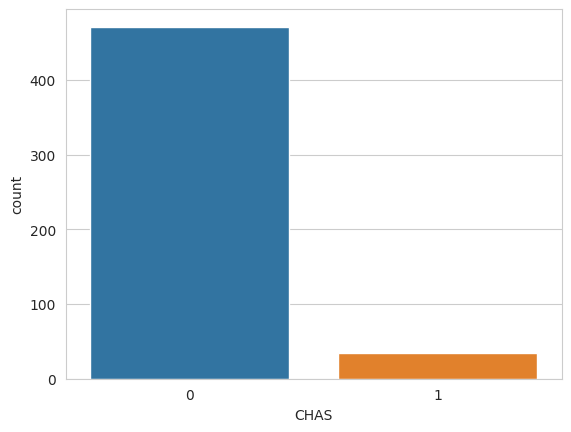

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=data)

<Axes: xlabel='RAD', ylabel='count'>

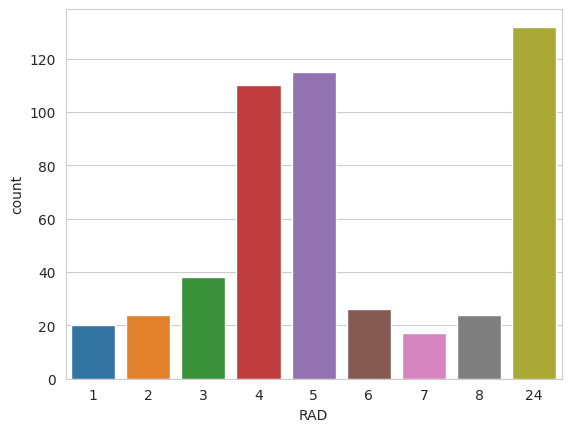

In [87]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=data)

Finding correlation between the features

In [88]:
corr = data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

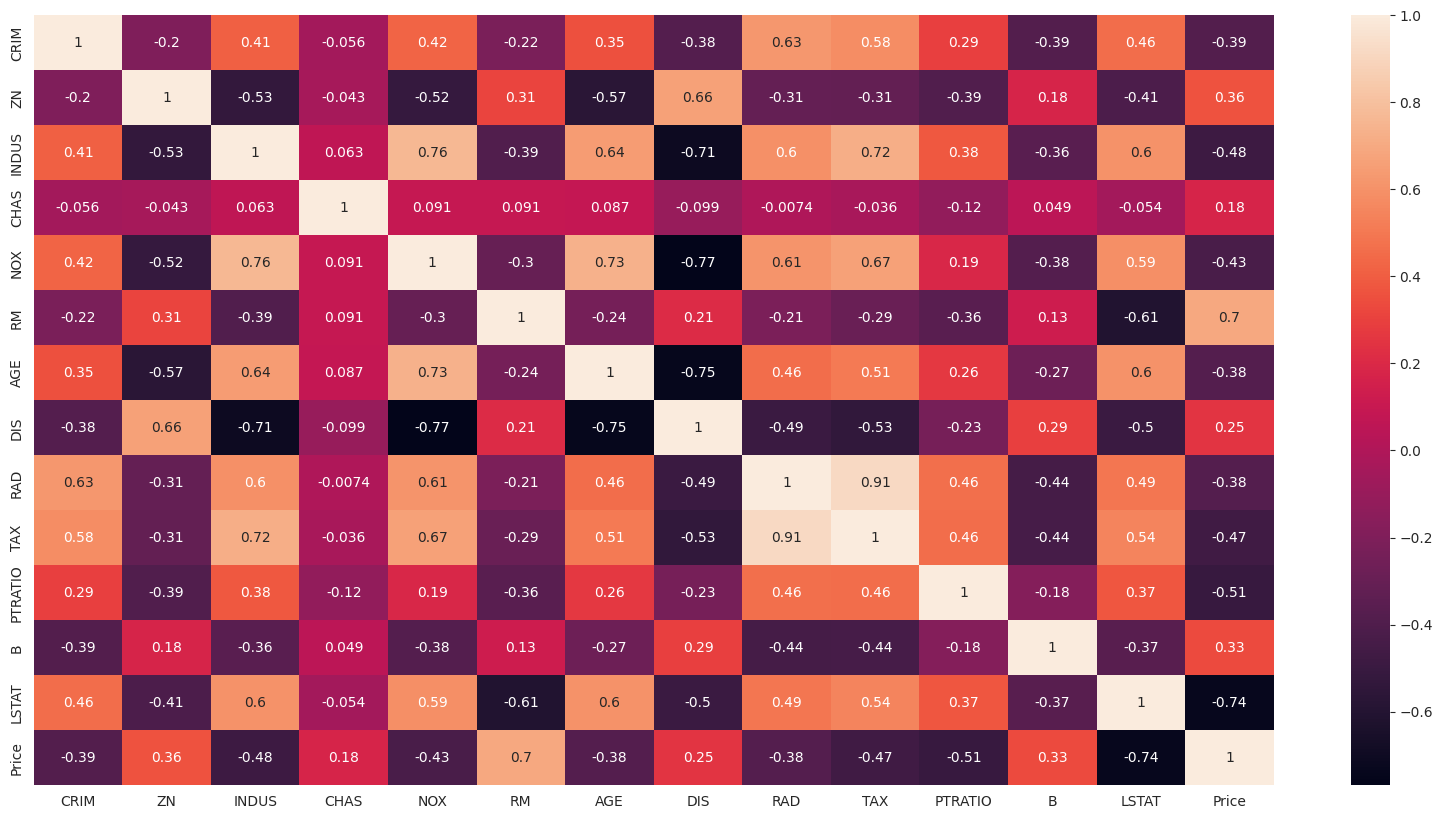

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [90]:
corr['Price'][abs(corr['Price']) > 0.5 ]

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

Feature Selection

In [91]:
data.drop(['CHAS','DIS'], axis=1,inplace =True)

In [92]:
x = data.iloc[:,0:11]
y = data.iloc[:,-1]

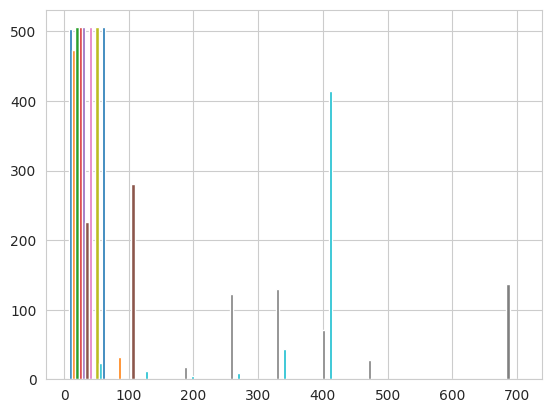

In [93]:
plt.hist(x)
plt.show()

Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

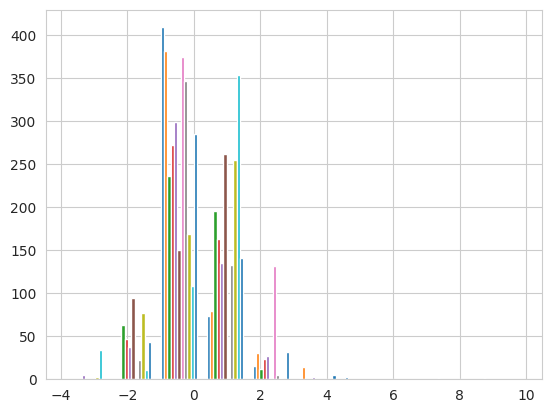

In [95]:
plt.hist(x)
plt.show()

Split the dataset

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=44, test_size=0.2)

Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_test, y_test)
print("Accuracy of the Linear Regression model:",lr_model.score(x_test, y_test)*100)

Accuracy of the Linear Regression model: 78.4155855586777


Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
dtr = DecisionTreeRegressor(random_state=44, max_leaf_nodes=20)
dtr.fit(x_train, y_train)
dtr.score(x_test, y_test)
print("Accuracy of the DT Regressor model:",dtr.score(x_test, y_test)*100)

Accuracy of the DT Regressor model: 81.41615244735259


Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=44)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)
print("Accuracy of the RF Regressor model:",rfr.score(x_test, y_test)*100)

Accuracy of the RF Regressor model: 87.15014559159006


XG Boost Regressor

In [102]:
import xgboost as xgb
xgr = xgb.XGBRegressor( learning_rate=0.1, max_depth=5)
xgr.fit(x_train, y_train)
xgr.score(x_test, y_test)
print("Accuracy of the XGB Regressor model:",xgr.score(x_test, y_test)*100)

Accuracy of the XGB Regressor model: 90.48139892687473


Pickle File of Predictive Model

In [103]:
import pickle
pickle.dump(xgr, open("xgmodel.pkl", 'wb'))

In [104]:
import joblib
joblib.dump(xgr, "xgmodel.joblib")

['xgmodel.joblib']

Deployment of Predictive Model

In [105]:
from string import Template
import math
width = 80
price_width = 20
parameter_width = width - price_width
header_fmt = '{{:{}}}{{:>{}}}'
header_fmt = header_fmt.format(parameter_width, price_width)
fmt = "{{:{}}}{{:{}}}".format(parameter_width, price_width)

print("WELCOME TO BOSTON HOUSE PRICE PREDICTOR".center(100, '*'))
print("\nPlease enter parameter values for house price")
print("=" * width)
print(header_fmt.format("Parameters", "values"))
print("=" * width)

CRIM = input("\nper capita crime rate by town:                                        ")
ZN = input("\nproportion of residential land zoned for lots over 25,000 sq.ft.:       ")
INDUS = input("\nproportion of non-retail business acres per town:                    ")
NOX = input("\nnitric oxides concentration (parts per 10 million):                    ")
RM = input("\naverage no. of rooms per dwelling value:                                ")
AGE = input("\nProportion of owner-occupied units built before 1940:                  ")
RAD = input("\nindex of accessibility to radial highways:                             ")
TAX = input("\nproperty Tax Rate per $10,000:                                         ")
PTRATIO = input("\npupil/teacher ratio by town:                                       ")
B = input("\nproportion of people of african american descent:                        ")
LSTAT = input("\n% of lower status of the population:                                 ")

parameters = [CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, B, LSTAT]
parameter_array = np.array(parameters, dtype = object)
predict = xgr.predict([parameter_array])
print("=" * width)

print("\nMedian value of owner-occupied homes in $1000 (Price of the property): ",predict)

******************************WELCOME TO BOSTON HOUSE PRICE PREDICTOR*******************************

Please enter parameter values for house price
Parameters                                                                values

per capita crime rate by town:                                        3.5

proportion of residential land zoned for lots over 25,000 sq.ft.:       12.5

proportion of non-retail business acres per town:                    11

nitric oxides concentration (parts per 10 million):                    0.5

average no. of rooms per dwelling value:                                5

Proportion of owner-occupied units built before 1940:                  20

index of accessibility to radial highways:                             11

property Tax Rate per $10,000:                                         400

pupil/teacher ratio by town:                                       20

proportion of people of african american descent:                        350

% of lower status 